In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# All the packages needed.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
#importing dataset
white_wine_data = pd.read_csv('/content/drive/MyDrive/White wine/winequality-white.csv', delimiter=';')

In [ ]:
white_wine_data['quality'] = np.where(white_wine_data['quality'] > 5, 1 , 0)

# Printing the changed values.
white_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [ ]:
correlation_map = white_wine_data.corr()

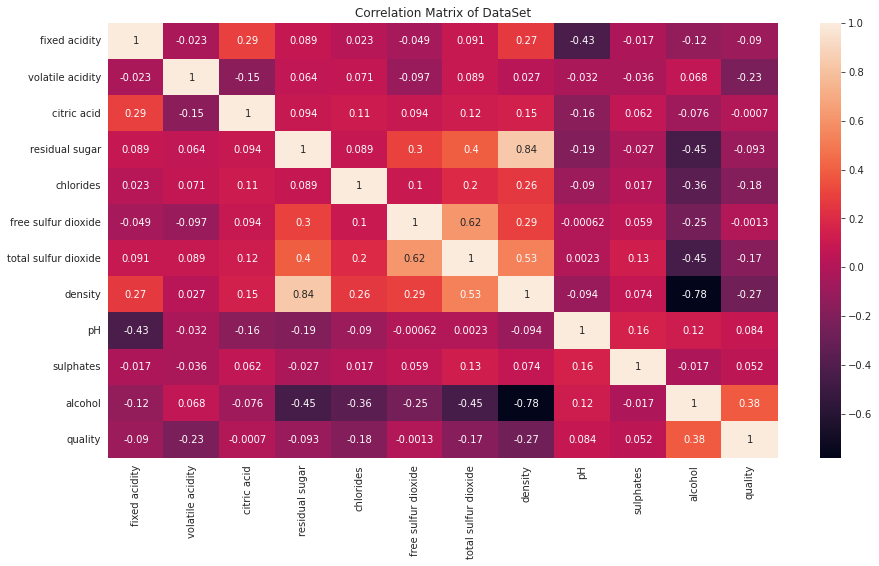

In [ ]:
# Plotting correlation matrix

plt.figure(figsize=(15,8))
plt.title("Correlation Matrix of DataSet")
sns.heatmap(correlation_map,annot=True)
plt.show()

In [ ]:
# PRinting the number of 0's and 1's
white_wine_data['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = white_wine_data[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = white_wine_data['quality']


In [ ]:
# Train test split the dataset
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.30, random_state=101)

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200,random_state=0) # Random forest model
rf_model = rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test) # predcitions of the Random Forest Model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print('Report for Random Forest Model\n')

# To print the confusion matrix
print('The confusion matrix is: ' + '\n \n',confusion_matrix(y_test,rf_predict))

# To print the classification report
print('\nThe classification report is: ' + '\n \n',classification_report(y_test,rf_predict))

acc_score = round(accuracy_score(y_test,rf_predict)*100,2)
print(f'Accuracy of our model is: {acc_score}')

Report for Random Forest Model

The confusion matrix is: 
 
 [[ 671  471]
 [ 258 2028]]

The classification report is: 
 
               precision    recall  f1-score   support

           0       0.72      0.59      0.65      1142
           1       0.81      0.89      0.85      2286

    accuracy                           0.79      3428
   macro avg       0.77      0.74      0.75      3428
weighted avg       0.78      0.79      0.78      3428

Accuracy of our model is: 78.73


In [ ]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.787


In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.04726544 0.13010119 0.09929575 0.10589413 0.13555557 0.10024555
 0.10562507 0.06571767 0.21029963]


In [ ]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
   feature_importance = np.array(importance)
   feature_names = np.array(names)

#Create a DataFrame using a Dictionary
   data={'feature_names':feature_names,'feature_importance':feature_importance}
   fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
   fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
   plt.figure(figsize=(10,8))
#Plot Searborn bar chart
   sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
   plt.title(model_type + 'FEATURE IMPORTANCE')
   plt.xlabel('FEATURE IMPORTANCE')
   plt.ylabel('FEATURE NAMES')

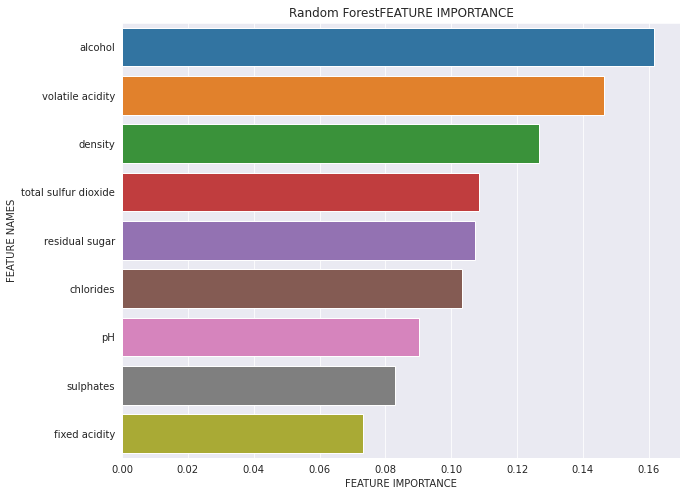

In [ ]:
plot_feature_importance(rf.feature_importances_,X_train.columns,"Random Forest")

ID3

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)

In [ ]:
print('Report for ID3 Model\n')

# To print the confusion matrix
print('The confusion matrix is: ' + '\n \n',confusion_matrix(y_test,clf_predict))

# To print the classification report
print('\nThe classification report is: ' + '\n \n',classification_report(y_test,clf_predict))

acc_score = round(accuracy_score(y_test,clf_predict)*100,2)
print(f'Accuracy of our model is: {acc_score}')

Report for ID3 Model

The confusion matrix is: 
 
 [[ 653  489]
 [ 463 1823]]

The classification report is: 
 
               precision    recall  f1-score   support

           0       0.59      0.57      0.58      1142
           1       0.79      0.80      0.79      2286

    accuracy                           0.72      3428
   macro avg       0.69      0.68      0.69      3428
weighted avg       0.72      0.72      0.72      3428

Accuracy of our model is: 72.23
